# Ensinando Computadores a Verem: Uma Introdução à Visão Computacional
### Demonstrações Práticas usando YOLOv11

Este notebook demonstra os conceitos fundamentais de Visão Computacional através de implementações práticas usando o modelo YOLOv11. Exploraremos três tarefas principais:

1. **Classificação de Imagens**: Identificando o conteúdo principal de uma imagem
2. **Detecção de Objetos**: Localizando e classificando múltiplos objetos em uma cena
3. **Segmentação Semântica**: Determinando o contorno exato de cada objeto

Autor: Daniel Amaral  
Instituição: UFC - PPGETI

## 🛠️ Configuração do Ambiente

Primeiro, vamos instalar e importar as bibliotecas necessárias. A principal biblioteca que utilizaremos é a `ultralytics`, que contém a implementação do YOLOv11.

In [1]:
%%capture
!pip install ultralytics
!wget https://raw.githubusercontent.com/damarals/scd24-visao-computacional/refs/heads/main/alpi.jpg -O alpi.jpg

In [2]:
# Importação das bibliotecas necessárias
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import display, Image
import warnings
import matplotlib.pyplot as plt

# Desativando avisos para uma saída mais limpa
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## 1. Classificação de Imagens 🏷️

A classificação de imagens é a tarefa mais fundamental em visão computacional. O objetivo é atribuir uma categoria/classe a uma imagem inteira.

### O que é Classificação?
- Responde à pergunta: "O que está nesta imagem?"
- Atribui uma única categoria à imagem completa
- Base para outras tarefas mais complexas

### Aplicações Práticas:
- Organização automática de fotos
- Filtros de conteúdo
- Diagnóstico médico por imagem
- Controle de qualidade industrial

In [3]:
def classify(image_path: str):
    """
    Classifica o conteúdo principal de uma imagem usando YOLOv11.

    Args:
        image_path (str): Caminho para a imagem a ser classificada

    Returns:
        None: Exibe a imagem com a classificação sobreposta
    """
    # Carregando o modelo pré-treinado para classificação
    model_cls = YOLO('yolo11n-cls.pt')

    # Fazendo a predição
    results = model_cls(image_path, verbose=False)
    result = results[0]

    # Obtendo a classe com maior confiança
    conf = result.probs.top1conf
    label = model_cls.names[result.probs.top1]

    # Lendo e convertendo a imagem para RGB
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Adicionando texto com a predição
    cv2.putText(img, f"{label}: {conf:.2f}", (15, 85),
                cv2.FONT_HERSHEY_SIMPLEX, 2.6, (139, 0, 0), 5)

    # Mostrando a imagem
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

100%|██████████| 5.52M/5.52M [00:00<00:00, 100MB/s]


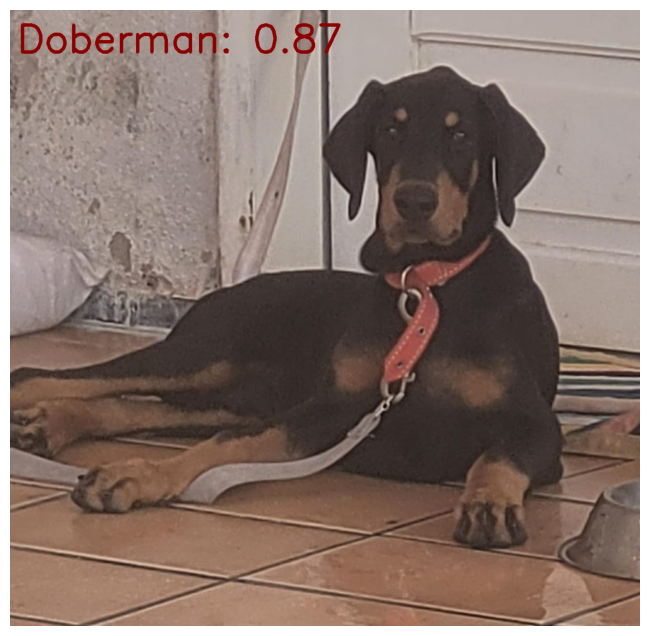

In [4]:
# Exemplo de classificação
classify('/content/alpi.jpg')

## 2. Detecção de Objetos 🎯

A detecção de objetos é uma tarefa mais complexa que combina localização e classificação. O modelo não apenas identifica o que está na imagem, mas também onde cada objeto está localizado.

### O que é Detecção?
- Responde às perguntas: "O que são e onde estão os objetos?"
- Gera caixas delimitadoras (bounding boxes)
- Atribui classes e níveis de confiança

### Aplicações Práticas:
- Sistemas de vigilância
- Carros autônomos
- Contagem de objetos
- Monitoramento de tráfego

In [5]:
def detect(image_path: str):
    """
    Detecta objetos em uma imagem usando YOLOv11.

    Args:
        image_path (str): Caminho para a imagem a ser analisada

    Returns:
        None: Exibe a imagem com as detecções sobrepostas
    """
    # Carregando o modelo pré-treinado para detecção
    model_det = YOLO('yolo11n.pt')

    # Realizando a detecção
    results = model_det(image_path, verbose=False)

    # Obtendo a imagem com as detecções
    img_detected = results[0].plot()

    # Mostrando a imagem
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

100%|██████████| 5.35M/5.35M [00:00<00:00, 72.4MB/s]


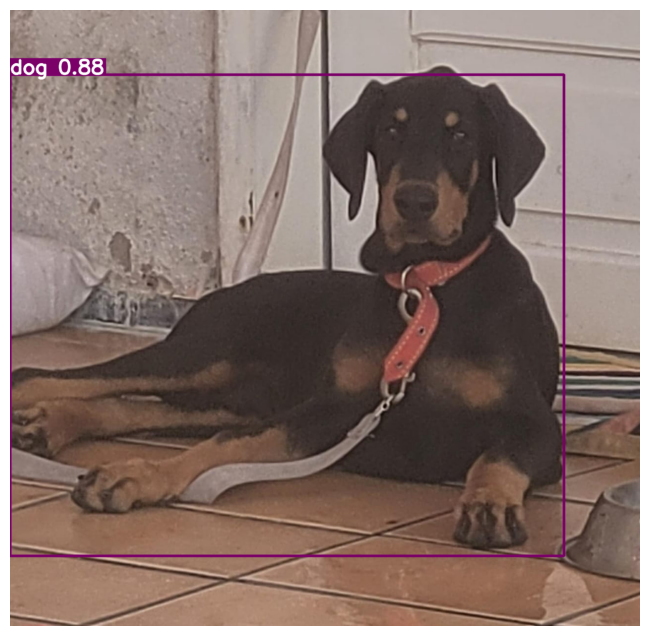

In [6]:
# Exemplo de detecção
detect('/content/alpi.jpg')

## 3. Segmentação Semântica 🎨

A segmentação semântica é a tarefa mais detalhada em visão computacional. Ela fornece uma compreensão pixel a pixel da imagem, identificando precisamente os contornos de cada objeto.

### O que é Segmentação?
- Responde à pergunta: "Qual é a forma exata de cada objeto?"
- Cria máscaras precisas para cada objeto
- Permite análise detalhada da cena

### Aplicações Práticas:
- Edição automática de imagens
- Análise médica e diagnóstico
- Realidade aumentada
- Robótica de precisão

In [7]:
def segment(image_path: str):
    """
    Realiza segmentação semântica em uma imagem usando YOLOv11.

    Args:
        image_path (str): Caminho para a imagem a ser segmentada

    Returns:
        None: Exibe a imagem com as segmentações sobrepostas
    """
    # Carregando o modelo pré-treinado para segmentação
    model_seg = YOLO('yolo11n-seg.pt')

    # Realizando a segmentação
    results = model_seg(image_path, verbose=False)

    # Obtendo a imagem com as segmentações
    img_segmented = results[0].plot()

    # Mostrando a imagem
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img_segmented, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

100%|██████████| 5.90M/5.90M [00:00<00:00, 82.5MB/s]


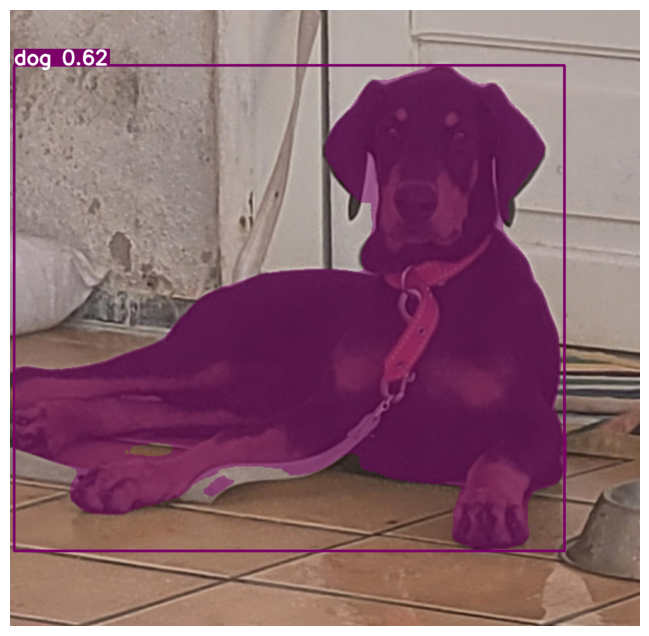

In [8]:
# Exemplo de segmentação
segment('/content/alpi.jpg')

## 4. Análise em Tempo Real 🎥

Uma das aplicações mais impressionantes da visão computacional é a análise em tempo real. Vamos demonstrar como realizar detecção e segmentação usando a webcam.

### Aplicações em Tempo Real:
- Sistemas de segurança
- Monitoramento de processos
- Interação homem-máquina
- Realidade aumentada

In [11]:
#@title Funções Auxiliares para Stream de Vídeo
#@markdown As funções abaixo são necessárias para configurar e gerenciar o stream de vídeo da webcam no ambiente Jupyter/Colab.
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

def js_to_image(js_reply):
    """Converte resposta JavaScript em imagem OpenCV"""
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

def bbox_to_bytes(bbox_array):
    """Converte array de bbox em string base64"""
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='png')
    bbox_bytes = 'data:image/png;base64,{}'.format(
        str(b64encode(iobuf.getvalue()), 'utf-8'))
    return bbox_bytes

def video_stream():
    js = Javascript('''
        var video;
        var div = null;
        var stream;
        var captureCanvas;
        var imgElement;
        var labelElement;

        var pendingResolve = null;
        var shutdown = false;

        function removeDom() {
            stream.getVideoTracks()[0].stop();
            video.remove();
            div.remove();
            video = null;
            div = null;
            stream = null;
            imgElement = null;
            captureCanvas = null;
            labelElement = null;
        }

        function onAnimationFrame() {
            if (!shutdown) {
                window.requestAnimationFrame(onAnimationFrame);
            }
            if (pendingResolve) {
                var result = "";
                if (!shutdown) {
                    captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
                    result = captureCanvas.toDataURL('image/jpeg', 0.8)
                }
                var lp = pendingResolve;
                pendingResolve = null;
                lp(result);
            }
        }

        async function createDom() {
            if (div !== null) {
                return stream;
            }

            div = document.createElement('div');
            div.style.border = '2px solid black';
            div.style.padding = '3px';
            div.style.width = '100%';
            div.style.maxWidth = '600px';
            document.body.appendChild(div);

            const modelOut = document.createElement('div');
            modelOut.innerHTML = "<span>Status:</span>";
            labelElement = document.createElement('span');
            labelElement.innerText = 'No data';
            labelElement.style.fontWeight = 'bold';
            modelOut.appendChild(labelElement);
            div.appendChild(modelOut);

            video = document.createElement('video');
            video.style.display = 'block';
            video.width = div.clientWidth - 6;
            video.setAttribute('playsinline', '');
            video.onclick = () => { shutdown = true; };
            stream = await navigator.mediaDevices.getUserMedia(
                {video: { facingMode: "environment"}});
            div.appendChild(video);

            imgElement = document.createElement('img');
            imgElement.style.position = 'absolute';
            imgElement.style.zIndex = 1;
            imgElement.onclick = () => { shutdown = true; };
            div.appendChild(imgElement);

            const instruction = document.createElement('div');
            instruction.innerHTML =
                '<span style="color: red; font-weight: bold;">' +
                'Clique aqui ou no vídeo para parar a detecção</span>';
            div.appendChild(instruction);
            instruction.onclick = () => { shutdown = true; };

            video.srcObject = stream;
            await video.play();

            captureCanvas = document.createElement('canvas');
            captureCanvas.width = 640;
            captureCanvas.height = 480;
            window.requestAnimationFrame(onAnimationFrame);

            return stream;
        }

        async function stream_frame(label, imgData) {
            if (shutdown) {
                removeDom();
                shutdown = false;
                return '';
            }

            var preCreate = Date.now();
            stream = await createDom();

            var preShow = Date.now();
            if (label != "") {
                labelElement.innerHTML = label;
            }

            if (imgData != "") {
                var videoRect = video.getClientRects()[0];
                imgElement.style.top = videoRect.top + "px";
                imgElement.style.left = videoRect.left + "px";
                imgElement.style.width = videoRect.width + "px";
                imgElement.style.height = videoRect.height + "px";
                imgElement.src = imgData;
            }

            var preCapture = Date.now();
            var result = await new Promise(function(resolve, reject) {
                pendingResolve = resolve;
            });
            shutdown = false;

            return {'create': preShow - preCreate,
                    'show': preCapture - preShow,
                    'capture': Date.now() - preCapture,
                    'img': result};
        }
        ''')
    display(js)

def video_frame(label, bbox):
    data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
    return data

### 4.1 Detecção em Tempo Real 📹

Vamos implementar a detecção de objetos em tempo real usando a webcam. Esta demonstração mostra como o YOLOv11 pode processar e analisar vídeo em tempo real, identificando e localizando objetos conforme eles aparecem no campo de visão.

In [12]:
def detect_webcam():
    """Realiza detecção de objetos em tempo real usando a webcam."""
    # Carrega o modelo YOLO
    model = YOLO("yolo11n.pt")

    # Inicia stream de vídeo
    video_stream()
    label_html = 'Detecting...'
    bbox = ''

    try:
        while True:
            js_reply = video_frame(label_html, bbox)
            if not js_reply:
                break

            # Converte resposta JS para imagem OpenCV
            img = js_to_image(js_reply["img"])

            # Faz a detecção com YOLO
            results = model(img, verbose=False)

            # Cria overlay transparente para bounding boxes
            bbox_array = np.zeros([480,640,4], dtype=np.uint8)

            # Desenha as detecções
            for result in results:
                boxes = result.boxes
                for box in boxes:
                    x1, y1, x2, y2 = box.xyxy[0]
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                    conf = float(box.conf[0])
                    cls = int(box.cls[0])
                    label = f"{model.names[cls]} {conf:.2f}"

                    # Desenha bbox e label
                    bbox_array = cv2.rectangle(bbox_array, (x1,y1), (x2,y2), (0,255,0), 2)
                    bbox_array = cv2.putText(bbox_array, label, (x1, y1-10),
                                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

            # Configura transparência
            bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255

            # Converte para formato adequado
            bbox_bytes = bbox_to_bytes(bbox_array)
            bbox = bbox_bytes
    except Exception as e:
        print(f"Erro durante a detecção: {e}")


In [14]:
# Iniciar detecção em tempo real
detect_webcam()

<IPython.core.display.Javascript object>

### 4.2 Segmentação em Tempo Real 🎨

Agora vamos demonstrar a segmentação semântica em tempo real. Esta é uma tarefa mais complexa que requer mais poder computacional, mas oferece uma compreensão mais detalhada da cena.

In [15]:
def segment_webcam():
    """Realiza segmentação semântica em tempo real usando a webcam."""
    # Carrega modelo de segmentação YOLOv11
    model = YOLO("yolo11n-seg.pt")

    # Inicia stream de vídeo
    video_stream()
    label_html = 'Segmenting...'
    bbox = ''

    try:
        while True:
            js_reply = video_frame(label_html, bbox)
            if not js_reply:
                break

            # Converte resposta JS para imagem OpenCV
            img = js_to_image(js_reply["img"])

            # Faz a segmentação com YOLO
            results = model(img, verbose=False)

            # Pega a imagem com as máscaras desenhadas
            segmented_frame = results[0].plot()

            # Converte para RGBA para poder sobrepor
            overlay = cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGBA)

            # Converte para bytes para mostrar no navegador
            bbox_bytes = bbox_to_bytes(overlay)
            bbox = bbox_bytes
    except Exception as e:
        print(f"Erro durante a segmentação: {e}")


In [16]:
# Iniciar segmentação em tempo real
segment_webcam()

<IPython.core.display.Javascript object>

## 5. Conclusão 🎯

Neste notebook, exploramos as três principais tarefas da visão computacional moderna:

1. **Classificação**: Identificação do conteúdo principal
2. **Detecção**: Localização e identificação de múltiplos objetos
3. **Segmentação**: Delineamento preciso de objetos

Também demonstramos como estas tarefas podem ser realizadas em tempo real, abrindo possibilidades para diversas aplicações práticas.

### Próximos Passos 🚀

- Experimente com suas próprias imagens
- Explore diferentes modelos e configurações

### Recursos Adicionais 📚

- [GitHub do Projeto](https://github.com/damarals/scd24-visao-computacional)